Matplotlib is building the font cache; this may take a moment.


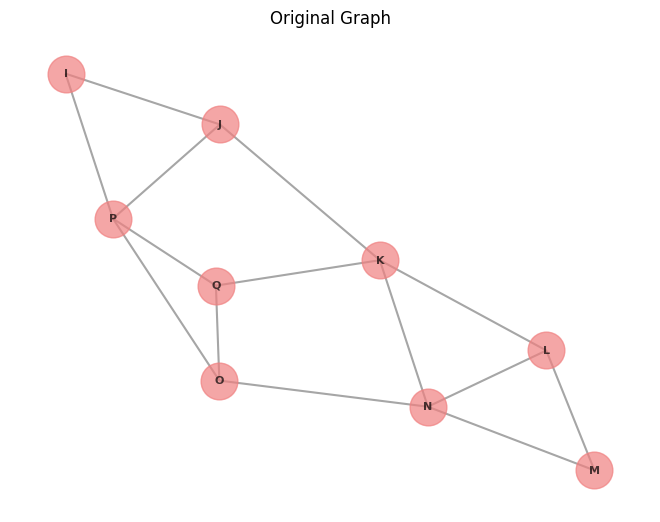

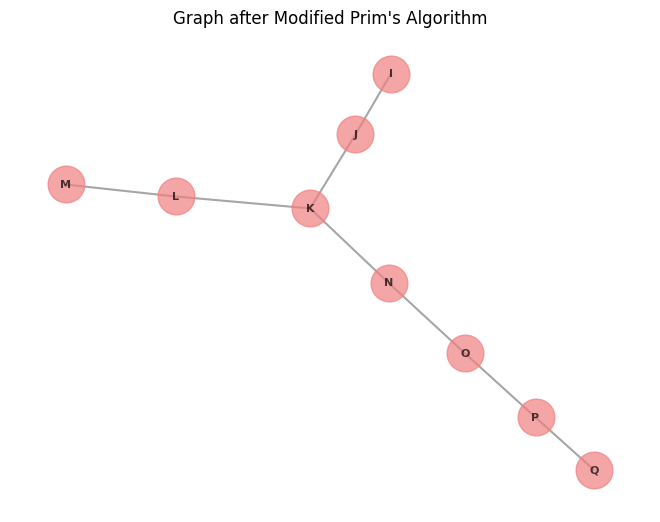

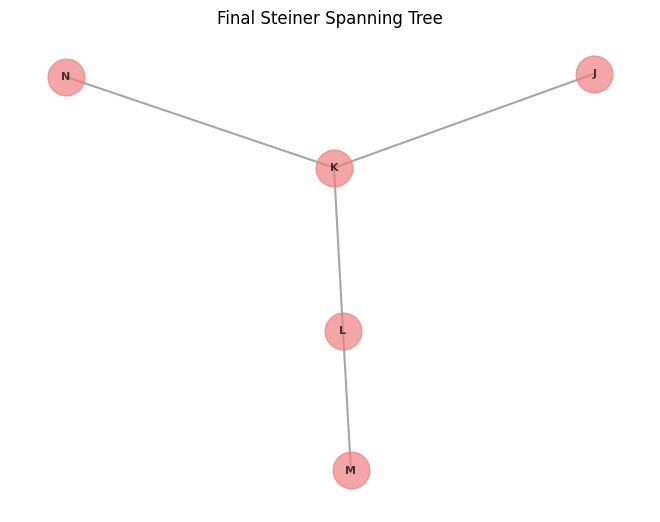

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

class Graph:
    def __init__(self):
        self.graph = defaultdict(dict)

    def add_edge(self, u, v, weight):
        self.graph[u][v] = weight
        self.graph[v][u] = weight

    def visualize_graph(self, G, title):
        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='lightcoral',
                font_size=8, font_color='black', edge_color='gray', width=1.5, alpha=0.7)
        plt.title(title)
        plt.show()

    def steiner_spanning_tree(self, vertices, terminals):
        mst_set = set()
        steiner_tree = defaultdict(dict)

        # Step 1: Choose one of the terminal vertices as the source
        source = terminals[0]

        # Step 2: Modified Prim's Algorithm
        mst_set.add(source)

        while set(terminals) - mst_set:
            min_edge = None
            min_weight = float('inf')

            for u in mst_set:
                for v, weight in self.graph[u].items():
                    if v not in mst_set and weight < min_weight:
                        min_edge = (u, v)
                        min_weight = weight

            if min_edge:
                u, v = min_edge
                mst_set.add(v)
                steiner_tree[u][v] = min_weight
                steiner_tree[v][u] = min_weight

        # Visualization using networkx and matplotlib just after Modified Prim's Algorithm
        self.visualize_graph(nx.Graph(self.graph), "Original Graph")
        self.visualize_graph(nx.Graph(steiner_tree), "Graph after Modified Prim's Algorithm")

        # Step 3: Delete Steiner vertices with one degree of connection
        while True:
            degree_one_vertices = [v for v in steiner_tree if len(steiner_tree[v]) == 1 and v not in terminals]
            if not degree_one_vertices:
                break

            for v in degree_one_vertices:
                neighbor = list(steiner_tree[v].keys())[0]
                del steiner_tree[v]
                del steiner_tree[neighbor][v]

        # Visualization using networkx and matplotlib for the final Steiner Spanning Tree
        self.visualize_graph(nx.Graph(steiner_tree), "Final Steiner Spanning Tree")

        return steiner_tree

# Example usage:
vertices = ['I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q']
edges = [('P', 'J', 10), ('P', 'I', 10), ('J', 'I', 5), ('K', 'J', 6), ('P', 'Q', 8), ('L', 'K', 6),
         ('Q', 'O', 9), ('N', 'K', 8), ('O', 'N', 4), ('P', 'O', 4), ('M', 'N', 12), ('L', 'N', 12),
         ('Q', 'K', 8), ('M', 'L', 8)]

terminals = ['J', 'K', 'M', 'N']

graph = Graph()

for edge in edges:
    graph.add_edge(edge[0], edge[1], edge[2])

steiner_tree = graph.steiner_spanning_tree(vertices, terminals)